## Simple Linear Regression

In [172]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [173]:
# read the dataset
df = pd.read_csv('height-weight.csv')

In [174]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


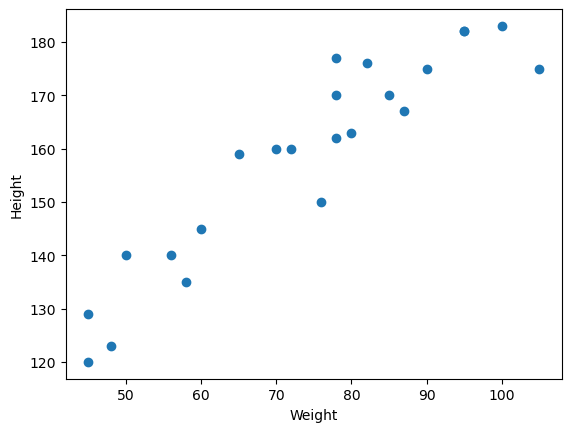

In [175]:
# visualizing the dataset using scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

## Divide independent and dependent features

In [177]:
# divide independent and dependent features in 2D array
X = df[['Weight']]  # independent feature
y = df[['Height']]   # dependent feature

In [178]:
# Test Tran and Split the dataset 
from sklearn.model_selection import train_test_split

In [179]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 42)

In [180]:
X.shape

(23, 1)

In [181]:
X_train.shape, X_test.shape

((18, 1), (5, 1))

## Standardize the data points

In [183]:
## Standardize the data points
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [184]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

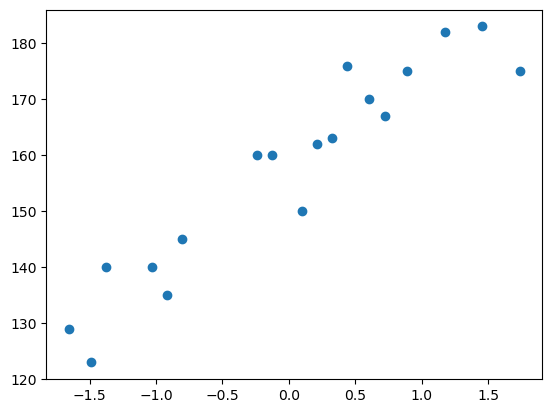

In [185]:
plt.scatter(X_train,y_train)
plt.show()

## Train the Model

In [187]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [188]:
regressor.fit(X_train,y_train)

LinearRegression()

In [189]:
print(f'The slope or coefficient of the weight is : {regressor.coef_}')
print(f'The intercept of the height is : {regressor.intercept_}')

The slope or coefficient of the weight is : [[17.03440872]]
The intercept of the height is : [157.5]


## Plotting the scatter graph

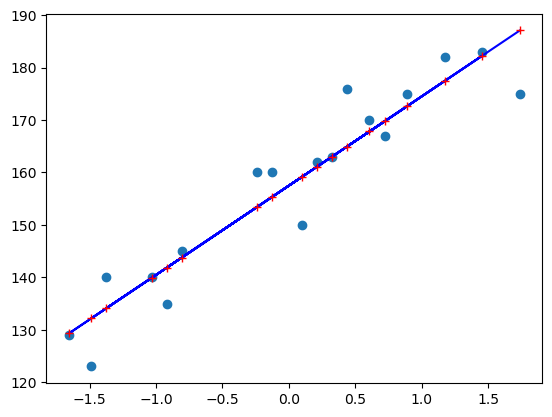

In [191]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'b')
plt.plot(X_train,regressor.predict(X_train),'r+')
plt.show()

## prediction of train data

    predicted height output= intercept +coef_(Weights)
    y_pred_train =157.5 + 17.03(X_train)

## prediction of test data

    predicted height output= intercept +coef_(Weights)
    y_pred_test =157.5 + 17.03(X_test)


In [193]:
y_pred_test = regressor.predict(X_test)

In [194]:
y_pred_test, y_test

(array([[161.08467086],
        [161.08467086],
        [129.3041561 ],
        [177.45645118],
        [148.56507414]]),
     Height
 15     177
 9      170
 0      120
 8      182
 17     159)

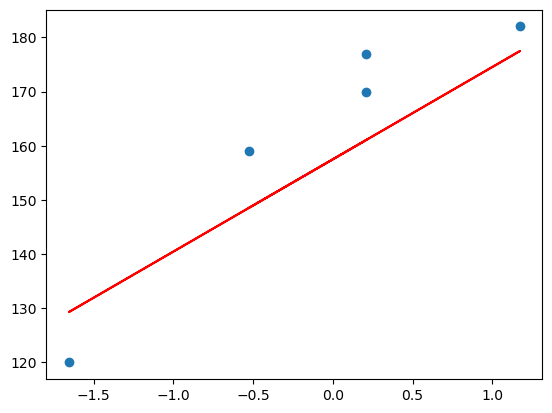

In [195]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'r')
plt.show()

## Performance Metrics

### MSE,MAE,RMSE
### R square and adjusted R square


In [197]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [198]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051654
9.822657814519227
10.477400726827076


## R square 
Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares

In [200]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred_test)

In [201]:
score

0.7769869860423441

## Adjusted R Square

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [203]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231254